Este colab fue desarrollado por Arnold Charry Armero.


# Redes Neuronales Recurrentes (RNN)

Las Redes Neuronales Recurrentes (RNN) son un tipo especial de red neuronal diseñada específicamente para procesar datos secuenciales o dependientes del tiempo, como series temporales, texto o señales. A diferencia de las redes neuronales feedforward tradicionales, las RNN poseen un mecanismo de memoria interna que les permite recordar información pasada y utilizarla para influir en el procesamiento de nuevas entradas.

Esto se logra gracias a que, en su arquitectura, las neuronas de las capas ocultas están conectadas entre sí de forma recurrente. En otras palabras, la salida de una neurona en un instante de tiempo $t−1$ se convierte en parte de la entrada de la misma neurona (u otra) en el instante $t$. Como resultado, la activación de una neurona no solo depende de la entrada actual, sino también del estado oculto anterior, lo que le confiere a la red la capacidad de modelar dependencias temporales.

Desde sus orígenes, las RNN surgieron con el objetivo de capturar dependencias a largo plazo dentro de secuencias. Sin embargo, en la práctica se encontró un problema fundamental durante el entrenamiento: cuando se aplica el algoritmo de Backpropagation Through Time (BPTT), las derivadas calculadas mediante la regla de la cadena pueden volverse extremadamente pequeñas o crecer sin límite al retropropagar a través de muchos pasos temporales.

*   Este fenómeno se conoce como Desvanecimiento del Gradiente cuando el valor absoluto del mayor eigenvalor de la matriz recurrente $𝑊_{𝑅}$ es menor que 1, lo que provoca que los gradientes tiendan a cero.
*   Por el contrario, cuando dicho eigenvalor es mayor que 1, se produce el Gradiente Explosivo, en el cual los gradientes crecen exponencialmente y el entrenamiento se vuelve inestable.

Para mitigar estos problemas se han propuesto diversas soluciones, entre las que destacan las arquitecturas Long Short-Term Memory (LSTM) y Gated Recurrent Unit (GRU), que incorporan mecanismos de compuertas para controlar el flujo de información. En este notebook la arquitectura a utilizar será la primera de ellas.

Antes de abordar la LSTM, es fundamental entender la formulación matemática básica de una RNN convencional, la cual se describe a continuación:

$$ h_t = \phi(W_{t} x_t + W_{t-1} h_{t-1} + b_t) $$

Donde,

- $x_t$: Vector de entrada en el instante de tiempo $t$. Representa el dato secuecial recibido por la red (por ejemplo, una palabra, un valor numérico en una serie temporal, etc.).

- $W_{t} $: Matriz de pesos que conecta la entrada $x_t$ con la capa oculta. Define cómo se transforma la entrada para contribuir al estado oculto.

- $W_{t-1}$: Matriz de pesos recurrentes que conecta el estado oculto anterior $h_{t-1}$ con el actual $h_t$. Permite a la red incorporar información pasada en el cálculo actual.

- $h_t$: Estado oculto en el instante $t$. Contiene la información combinada de la entrada actual $x_t$ y el estado anterior $h_{t-1}$, funcionando como la "memoria" de la red.

- $b_t$: Vector de sesgo asociado a la capa oculta. Se suma a la combinación lineal de entrada y estado anterior para mejorar la capacidad de ajuste del modelo.

- $\phi(\cdot)$: Función de activación no lineal utilizada en la capa oculta. Comúnmente se usa $\tanh$ o $\mathrm{ReLU}$, ya que permiten modelar relaciones no lineales y controlar el rango de los valores de $h_t$.

Ahora, matemáticamente, para la capa de salida,

$$y_t = \psi(W_{ts} h_t + b_0) $$

 - $W_{ts}$: Matriz de pesos que conecta el estado oculto actual $h_t$ con la salida $y_t$. Determina cómo el estado oculto se traduce en la salida final.

- $b_0$: Vector de sesgo asociado a la capa de salida. Ajusta el resultado de la transformación lineal desde la capa oculta.

- $y_t$: Salida generada por la red en el instante $t$. Puede representar, por ejemplo, una predicción o una clasificación asociada a la secuencia.

- $\psi(\cdot)$: Función de activación utilizada en la capa de salida. Puede ser, por ejemplo, la identidad (en regresión), $\mathrm{softmax}$ (en clasificación multiclase) o $\sigma$ (en clasificación binaria).


# Long Short-Term Memory (LSTM)

Las Long Short-Term Memory (LSTM) son un tipo especial de Red Neuronal Recurrente (RNN) diseñadas específicamente para superar el problema del desvanecimiento y explosión del gradiente que suelen presentarse en las RNN tradicionales al procesar secuencias largas. Su innovación principal radica en la incorporación de una celda de memoria capaz de retener información relevante durante largos periodos de tiempo, así como en el uso de mecanismos de compuertas que regulan el flujo de información dentro y fuera de cada unidad.

Cada neurona LSTM contiene una celda de memoria ($C_{t}$) que almacena información a través del tiempo y tres compuertas fundamentales que controlan la entrada, el olvido y la salida de información. Estas compuertas utilizan funciones sigmoides para generar valores entre 0 y 1, lo que permite decidir en qué grado se conserva, se actualiza o se libera la información. El comportamiento de cada compuerta es el siguiente:

- Puerta de olvido ($f_{t}$): Decide qué información del estado de memoria anterior debe conservarse y cuál debe descartarse. Un valor cercano a 0 implica que la información será olvidada, mientras que un valor cercano a 1 implica que se conservará. Matemáticamente se define de la siguiente manera:

$$ f_t = \sigma(W_f x_t + U_f h_{t-1} + b_f) $$

- Puerta de entrada ($i_{t}$): Determina qué nueva información será agregada a la celda de memoria. Primero, calcula los valores candidatos a ser incorporados ($\tilde{C}_t$), y luego decide qué proporción de esta nueva información se añadirá al estado de memoria. Matemáticamente se define así:

$$ i_t = \sigma(W_i x_t + U_i h_{t-1} + b_i)$$

$$ \tilde{C}_t = \tanh(W_c x_t + U_c h_{t-1} + b_c)$$

- Actualización del estado de memoria ($C_{t}$): El nuevo estado de memoria es una combinación ponderada entre la memoria anterior y la nueva información seleccionada:

$$ C_t = f_t \odot C_{t-1} + i_t \odot \tilde{C}_t $$

- Puerta de salida ($o_{t}$): Controla qué parte de la información contenida en la celda de memoria será emitida como salida de la unidad LSTM. Esta salida será utilizada tanto como salida de la red en el instante
$t$ como entrada recurrente para el siguiente paso temporal:

$$ o_t = \sigma(W_o x_t + U_o h_{t-1} + b_o) $$

$$ h_t = o_t \odot \tanh(C_t) $$

Donde,

- $x_t$: Vector de entrada en el instante de tiempo $t$. Representa el dato secuencial recibido por la red.

- $h_{t-1}$: Estado oculto en el instante anterior $(t-1)$. Contiene la información procesada hasta el paso anterior y sirve como contexto para el paso actual.

- $C_{t-1}$: Estado de memoria de la celda en el instante anterior $(t-1)$. Retiene la información relevante a lo largo del tiempo.

- $f_t$: Salida de la puerta de olvido. Determina qué proporción de la memoria anterior $C_{t-1}$ debe mantenerse o descartarse.

- $i_t$: Salida de la puerta de entrada. Decide qué nueva información será agregada a la celda de memoria.

- $\tilde{C}_t$: Vector de candidatos a memoria. Representa la nueva información potencial que puede incorporarse al estado de memoria.

- $C_t$: Nuevo estado de memoria en el instante $t$. Es la combinación de la memoria retenida y la nueva información incorporada.

- $o_t$: Salida de la puerta de salida. Controla qué parte de la información contenida en la celda será emitida como salida.

- $h_t$: Estado oculto en el instante $t$. Resultado final de la celda LSTM que se envía a la siguiente capa o al siguiente paso temporal.

- $W_f, W_i, W_c, W_o$: Matrices de pesos asociadas a las puertas de olvido, entrada, candidatos y salida, respectivamente.

- $U_f, U_i, U_c, U_o$: Matrices de pesos recurrentes asociadas al estado oculto anterior en cada puerta.

- $b_f, b_i, b_c, b_o$: Vectores de sesgo correspondientes a cada una de las puertas de la unidad LSTM.

- $\sigma(\cdot)$: Función sigmoide logística. Limita el valor de salida entre 0 y 1, indicando el grado de activación de cada puerta.

- $\tanh(\cdot)$: Función tangente hiperbólica. Se utiliza para escalar valores en el rango $[-1, 1]$ y aportar no linealidad.

- $\odot$: Producto elemento a elemento, utilizado para combinar señales de forma punto a punto.

Durante el entrenamiento, las redes LSTM utilizan funciones de pérdida estándar dependiendo de la tarea: Error Cuadrático Medio (MSE) para problemas de regresión y entropía cruzada (binaria o categórica) para problemas de clasificación. Un optimizador, como Adam o SGD, ajusta los parámetros de la red a través del descenso del gradiente, mejorando su capacidad predictiva con cada iteración.

Ahora se continúa con la implementación en código,

In [ ]:
# Se instala keras tuner
!pip install keras-tuner --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
# Se importan las librerias
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Input
from keras_tuner import HyperParameters
from keras.callbacks import EarlyStopping
from keras_tuner import BayesianOptimization
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pandas.api.types import is_numeric_dtype, is_object_dtype, is_string_dtype

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Bases de Datos/us_monthly.csv')

In [ ]:
df.head()

,Date,Consumption (MMcf)
0,2001-01-01,2676998
1,2001-02-01,2309464
2,2001-03-01,2246633
3,2001-04-01,1807170
4,2001-05-01,1522382


Primero se analiza la base de datos,

In [ ]:
# Se verifica la cantidad de datos
df.shape

(242, 2)

Se puede observar que hay 242 filas. Se observará de qué tipo son estos valores y si hay faltantes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 242 non-null    object
 1    Consumption (MMcf)  242 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [ ]:
# Se verifica el tema de los faltantes
df.isnull().sum()[df.isnull().sum() != 0]

,0


In [ ]:
# Se cambia el nombre de la columna
df.rename(columns = {' Consumption (MMcf)': 'Consumption (MMcf)'.strip()}, inplace=True)

Se puede observar que no hay faltantes. Como son series temporales, no se pueden modificar los datos. Se grafica la distribución de la demanda mensual.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                242 non-null    object
 1   Consumption (MMcf)  242 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


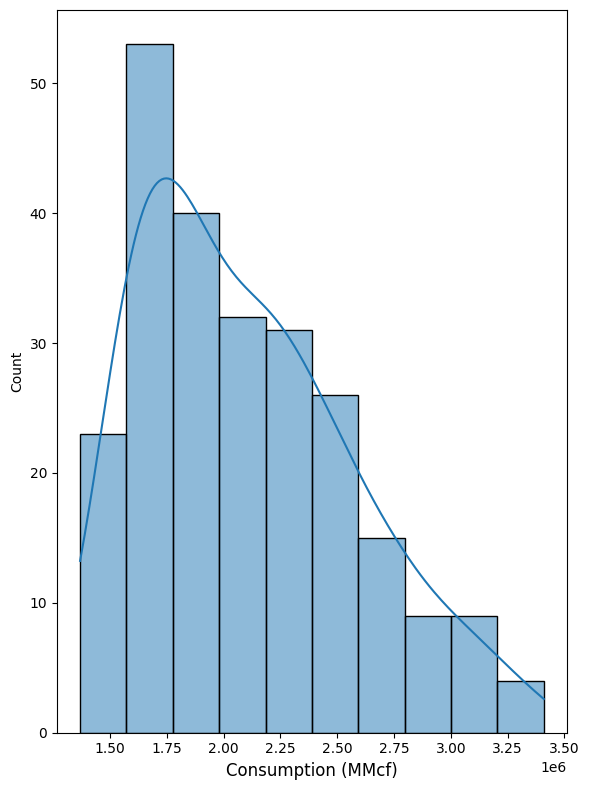

In [ ]:
# Se grafica la distribución de los datos
plt.figure(figsize=(6, 8))
sns.histplot(df['Consumption (MMcf)'], kde=True)
plt.xlabel('Consumption (MMcf)', fontsize=12)
plt.tight_layout()
plt.show()

Ahora se hará un gráfico de líneas para analizar el comportamiento de la demanda,

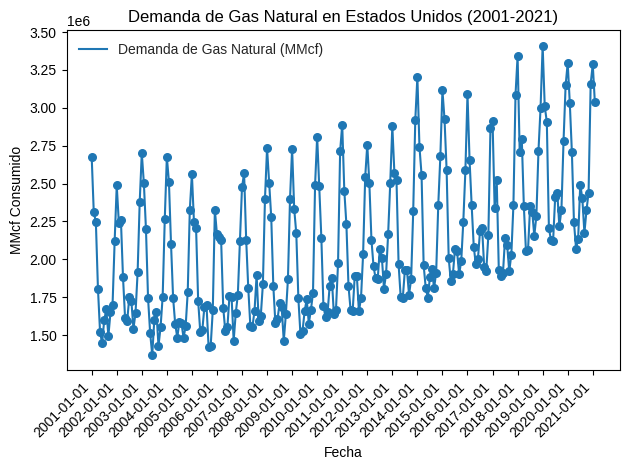

In [ ]:
# Se realiza el gráfico de los datos
plt.plot(df.iloc[:, 0], df.iloc[:, 1], linestyle='solid', label='Demanda de Gas Natural (MMcf)')

# Agregar puntos sobre cada valor de la demanda
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color='#1f77b4', s=30)

# Formatear fechas en el eje X
plt.gcf().autofmt_xdate()

# Estilo del gráfico
plt.style.use('seaborn-v0_8-dark')
plt.title("Demanda de Gas Natural en Estados Unidos (2001-2021)")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.xticks(df['Date'][::12])
plt.ylabel("MMcf Consumido")

# Mostrar el gráfico
plt.tight_layout()
plt.legend()
plt.show()

Se mira una descripción de los datos,

In [ ]:
df.describe()

,Consumption (MMcf)
count,2.420000e+02
mean,2.106091e+06
std,4.652404e+05
min,1.368369e+06
25%,1.728400e+06
50%,2.031691e+06
75%,2.403223e+06
max,3.409295e+06


## Preprocesamiento de Datos

In [ ]:
# Se vuelve la columna de fecha en formato de date
df['Date'] = pd.to_datetime(df['Date'])

## Separación en Base de Datos en Entrenamiento y Prueba

In [ ]:
# Se divide en entrenamiento y prueba
train = df[df['Date'] < '2020-02-01']
test = df[df['Date'] >= '2020-02-01']

## Escalado de Datos

In [ ]:
# Escalar solo las columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Se escalan sólo esas columnas
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled_num = pd.DataFrame(scaler.fit_transform(train[num_cols]), columns=num_cols)
test_scaled_num = pd.DataFrame(scaler.transform(test[num_cols]), columns=num_cols)

# Se concatena con la columna Date
train = pd.concat([train[['Date']].reset_index(drop=True), train_scaled_num], axis=1)
test = pd.concat([test[['Date']].reset_index(drop=True), test_scaled_num], axis=1)

Queremos predecir la demanda en los últimos 4 años,

In [ ]:
# Pasamos los valores a arrays
train = train.iloc[:, 1].values

# Convertir train a array de floats
train = train.astype(np.float32)

In [ ]:
# Se usan tres años previos para ir entrenando
lookback = 36

# El horizonte del forecasting son los últimos 12 meses
forecast_horizon = 12

X_train = []
y_train = []

# Ajustamos el rango para que quepan los 12 meses de salida
for i in range(lookback, len(train) - forecast_horizon + 1):
    # Entrada: los 36 meses anteriores
    X_train.append(train[i - lookback:i])

    # Salida: los 12 meses siguientes
    y_train.append(train[i:i + forecast_horizon])

X_train, y_train = np.array(X_train), np.array(y_train)

# Se cambia de forma a [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("Shape de X_train:", X_train.shape)
print("Shape de y_train:", y_train.shape)

Shape de X_train: (182, 36, 1)
Shape de y_train: (182, 12)


## Entrenamiento del Modelo

In [ ]:
# Se inicializa la Red Neuronal
regressor = Sequential()

In [ ]:
regressor.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

In [ ]:
# Primera Capa Oculta
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Segunda Capa Oculta
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Tercera Capa Oculta
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Cuarta Capa Oculta
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
# Capa de Salida
regressor.add(Dense(units = 12))

In [ ]:
# Definimos los hiperparámetros
regressor.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [ ]:
# Entrenamiento con EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Información de Entrenamiento
print("X_train.shape:", X_train.shape)
print("Batch size:", 16)
n_batches = mt.ceil(X_train.shape[0]/16)
print("Batches esperados por epoch:", n_batches)

X_train.shape: (182, 36, 1)
Batch size: 16
Batches esperados por epoch: 12


In [ ]:
# Entrenamos la LSTM
regressor.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, callbacks=[early_stop], verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.1251 - mae: 0.2886 - val_loss: 0.0708 - val_mae: 0.2023
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0562 - mae: 0.1893 - val_loss: 0.0789 - val_mae: 0.2065
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0473 - mae: 0.1763 - val_loss: 0.0741 - val_mae: 0.1983
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0451 - mae: 0.1756 - val_loss: 0.0695 - val_mae: 0.1915
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0438 - mae: 0.1725 - val_loss: 0.0642 - val_mae: 0.1840
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0427 - mae: 0.1671 - val_loss: 0.0626 - val_mae: 0.1821
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0423 - mae: 0.1651 - val_loss: 0.0456 - val_mae: 0.1670
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0416 - mae: 0.1690 - val_loss: 0.0619 - val_mae: 0.1812
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - 

In [ ]:
# Se selecciona el conjunto de test
X_test = []
X_test.append(train[-lookback:])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Los 12 meses que se quieren predecir
y_test = test.iloc[:forecast_horizon, 1].values
y_test= y_test.reshape(-1, 1)

y_test = scaler.inverse_transform(y_test)
y_test = y_test.flatten()

In [ ]:
# Obtenemos las predicciones
y_pred = scaler.inverse_transform(regressor.predict(X_test))
y_pred = y_pred.flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


## Rendimiento del Modelo

In [ ]:
# KPI's del Modelo
MAE = mean_absolute_error(y_test, y_pred)
print('MAE: {:0.2f}%'.format(MAE / np.mean(y_test) * 100))
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: {:0.2f}%'.format(RMSE / np.mean(y_test) * 100))
r2 = r2_score(y_test, y_pred)
print('R2: {:0.2f}'.format(r2))

MAE: 13.96%
RMSE: 15.25%
R2: 0.05


Se visualizan los resultados,

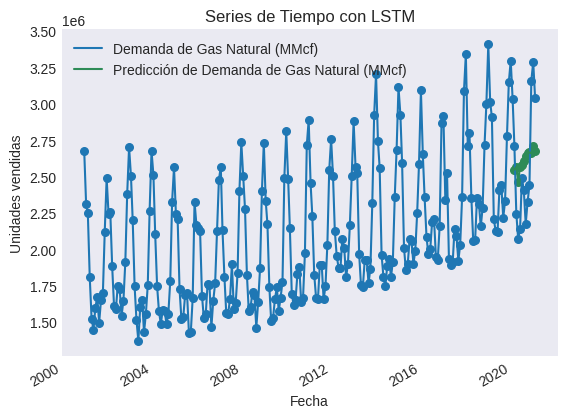

In [ ]:
# Graficamos las series de tiempo
plt.plot(df.iloc[:, 0], df.iloc[:, 1], label = 'Demanda de Gas Natural (MMcf)')
plt.plot(df.iloc[-12:, 0], y_pred, label = 'Predicción de Demanda de Gas Natural (MMcf)', color = '#2E8B57')

# Formatear fechas en el eje X
plt.gcf().autofmt_xdate()

# Colocamos los puntos
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color='#1f77b4', s=30)
plt.scatter(df.iloc[-12:, 0], y_pred, color='#2E8B57', s=30)

# Colocamos las etiquetas
plt.legend(loc = 'best')
plt.title('Series de Tiempo con LSTM')
plt.xlabel("Fecha")
plt.ylabel("Unidades vendidas")
plt.show()

Se puede observar que los resultados no son muy buenos. Por lo tanto, se van a optimizar los hiperpárametros para obtener un mejor resultado.

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

    # Número de capas ocultas (2, 3 o 4)
    num_layers = hp.Int('num_layers', min_value=2, max_value=4, step=1)

    # ---- Capa 1 ----
    model.add(LSTM(
        units=hp.Int('units_1', 20, 50, step=5),
        return_sequences=(num_layers > 1)
    ))
    model.add(Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)))

    # ---- Capa 2 ----
    if num_layers >= 2:
        model.add(LSTM(
            units=hp.Int('units_2', 20, 50, step=5),
            return_sequences=(num_layers > 2)
        ))
        model.add(Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)))

    # ---- Capa 3 (opcional) ----
    if num_layers >= 3:
        model.add(LSTM(
            units=hp.Int('units_3', 20, 50, step=5),
            return_sequences=(num_layers > 3)
        ))
        model.add(Dropout(hp.Float('dropout_3', 0.1, 0.5, step=0.1)))

    # ---- Capa 4 (opcional) ----
    if num_layers == 4:
        model.add(LSTM(
            units=hp.Int('units_4', 20, 50, step=5),
            return_sequences=False
        ))
        model.add(Dropout(hp.Float('dropout_4', 0.1, 0.5, step=0.1)))

    # ---- Capa de salida ----
    model.add(Dense(12))

    # Compilación con optimizador elegido por el tuner
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='mse',
        metrics=['mae']
    )

    return model

In [ ]:
# Validación Temporal
tscv = TimeSeriesSplit(n_splits=3)
for train_idx, val_idx in tscv.split(X_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

In [ ]:
# Definir tuner con Bayesian Optimization
tuner = BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=30,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='lstm_forecast_input')

# Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True)

# Ejecutar búsqueda
tuner.search(
    X_train_fold, y_train_fold,
    validation_data=(X_val_fold, y_val_fold),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1)

Trial 30 Complete [00h 00m 52s]
val_loss: 0.010186790488660336

Best val_loss So Far: 0.00896663498133421
Total elapsed time: 00h 20m 35s


In [ ]:
# Se Obtienen los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
num_layers = best_hps.get('num_layers')
print("num_layers (reportado por best_hps):", num_layers)

# Se Construye el modelo **a partir** de esos hiperparámetros
model_from_hps = tuner.hypermodel.build(best_hps)

# 3) Mostrar la arquitectura real
model_from_hps.summary()

num_layers (reportado por best_hps): 3


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 36, 30)         │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 36, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 36, 40)         │        11,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 36, 40)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 25)             │         6,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,112 (86.38 KB)

 Trainable params: 22,112 (86.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]

# Extraemos el optimizador óptimo desde los hiperparámetros
opt = best_hps.get('optimizer')

# Recompilamos el modelo con ese optimizador (sin modificar la elección)
best_model.compile(optimizer=opt, loss='mse', metrics=['mae'])

print("Mejor configuración (filtrada):")
print("num_layers:", num_layers)
for i in range(1, num_layers+1):
    print(f"units_{i}:", best_hps.get(f'units_{i}'))
    print(f"dropout_{i}:", best_hps.get(f'dropout_{i}'))
print("optimizer:", best_hps.get('optimizer'))

Mejor configuración (filtrada):
num_layers: 3
units_1: 30
dropout_1: 0.5
units_2: 40
dropout_2: 0.30000000000000004
units_3: 25
dropout_3: 0.1
optimizer: adam


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
best_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, callbacks=[early_stop], verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0099 - mae: 0.0765 - val_loss: 0.0159 - val_mae: 0.1076
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0091 - mae: 0.0735 - val_loss: 0.0131 - val_mae: 0.0978
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0090 - mae: 0.0728 - val_loss: 0.0106 - val_mae: 0.0836
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0090 - mae: 0.0729 - val_loss: 0.0100 - val_mae: 0.0808
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0092 - mae: 0.0747 - val_loss: 0.0113 - val_mae: 0.0887
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0095 - mae: 0.0740 - val_loss: 0.0107 - val_mae: 0.0857
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0085 - mae: 0.0703 - val_loss: 0.0168 - val_mae: 0.1129
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0085 - mae: 0.0681 - val_loss: 0.0172 - val_mae: 0.1094
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - l

In [ ]:
# Predicción sobre X_test
y_pred = best_model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred.flatten()

# Preparar y_test (invertir escala)
y_test_scaled = test.iloc[:forecast_horizon, 1].values.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test_scaled).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


In [ ]:
# KPI's del Modelo
MAE = mean_absolute_error(y_test, y_pred)
print('MAE: {:0.2f}%'.format(MAE / np.mean(y_test) * 100))
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: {:0.2f}%'.format(RMSE / np.mean(y_test) * 100))
r2 = r2_score(y_test, y_pred)
print('R2: {:0.2f}'.format(r2))

MAE: 3.98%
RMSE: 5.00%
R2: 0.90


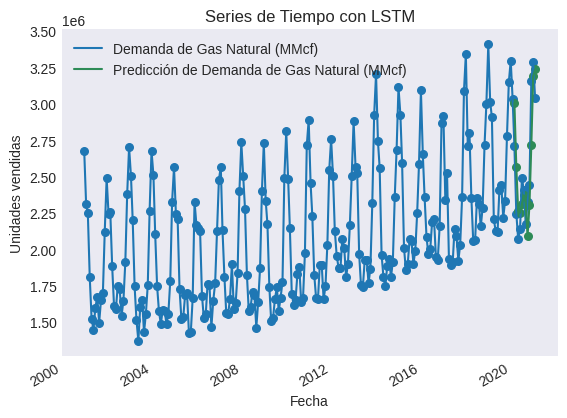

In [ ]:
# Graficamos las series de tiempo
plt.plot(df.iloc[:, 0], df.iloc[:, 1], label = 'Demanda de Gas Natural (MMcf)')
plt.plot(df.iloc[-12:, 0], y_pred, label = 'Predicción de Demanda de Gas Natural (MMcf)', color = '#2E8B57')

# Formatear fechas en el eje X
plt.gcf().autofmt_xdate()

# Colocamos los puntos
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color='#1f77b4', s=30)
plt.scatter(df.iloc[-12:, 0], y_pred, color='#2E8B57', s=30)

# Colocamos las etiquetas
plt.legend(loc = 'best')
plt.title('Series de Tiempo con LSTM')
plt.xlabel("Fecha")
plt.ylabel("Unidades vendidas")
plt.show()

## Referencias

*   Jacinto, V. R. (2024). Machine learning: Fundamentos, algoritmos y aplicaciones para los negocios, industria y finanzas. Ediciones Díaz de Santos.
*   Raschka, S., & Mirjalili, V. (2017). Python Machine Learning: Machine Learning and Deep Learning with Python, Scikit-learn, and TensorFlow.
*   USGAS Dataset. (2024b, March 12). Kaggle. https://www.kaggle.com/datasets/mexwell/usgas-dataset
*   Vandeput, N. (2021). Data science for supply chain forecasting. de Gruyter.